In [1]:
import numpy as np
from matplotlib import pyplot as plt
import os
from PIL import Image
from skimage.color import lab2rgb, rgb2lab, rgb2gray

# fruit dataset

In [4]:
root = 'data/train'
size = [224,224]
imgs_a = []
imgs_b = []
for subdir in os.listdir(root):
    root_sub = os.path.join(root, subdir)
    for img_name in os.listdir(root_sub):
        root_img = os.path.join(root_sub, img_name)
        img = Image.open(root_img).resize(size)
        img = np.asarray(img)
        img_lab = rgb2lab(img)
        imgs_a.append(img_lab[:,:,1])
        imgs_b.append(img_lab[:,:,2])
a = np.stack(imgs_a, axis=0)
b = np.stack(imgs_b, axis=0)

In [5]:
x = a.reshape([-1,])
y = b.reshape([-1,])
idx_x = (x>110) + (x<-110) + np.isnan(x)
idx_y = (y>110) + (y<-110) + np.isnan(y)
x_new = x[~idx_x]
y_new = y[~idx_x]
print(x.shape)
print(x_new.shape)
print(y_new.shape)

(28700672,)
(28700672,)
(28700672,)


C:\Users\Hao\AppData\Local\Temp/ipykernel_21160/3872900061.py:4: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(X, Y, np.log(h.T))


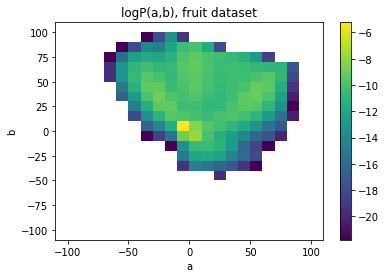

In [6]:
h_range = np.array([[-110,110], [-110,110]])
h, xaxis, yaxis = np.histogram2d(x_new, y_new, bins=22, range=h_range, density=True)
X,Y = np.meshgrid(xaxis, yaxis)
plt.pcolormesh(X, Y, np.log(h.T))
plt.colorbar()
plt.title('logP(a,b), fruit dataset')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

# \art_images\musemart\training_set\iconography

In [7]:
root = 'data/art_images/musemart/training_set/iconography/total'
size = [224,224]
imgs_a = []
imgs_b = []
for img_name in os.listdir(root):
    root_img = os.path.join(root, img_name)
    img = Image.open(root_img).resize(size)
    img = np.asarray(img)
    img_lab = rgb2lab(img)
    imgs_a.append(img_lab[:,:,1])
    imgs_b.append(img_lab[:,:,2])
a = np.stack(imgs_a, axis=0)
b = np.stack(imgs_b, axis=0)

In [8]:
x = a.reshape([-1,])
y = b.reshape([-1,])
idx_x = (x>110) + (x<-110) + np.isnan(x)
idx_y = (y>110) + (y<-110) + np.isnan(y)
x_new = x[~idx_x]
y_new = y[~idx_x]
print(x.shape)
print(x_new.shape)
print(y_new.shape)

(33818624,)
(33818624,)
(33818624,)


C:\Users\Hao\AppData\Local\Temp/ipykernel_21160/232295639.py:4: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(X, Y, np.log(h.T))


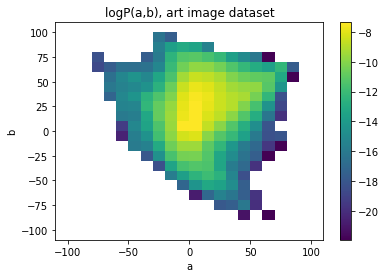

In [9]:
h_range = np.array([[-110,110], [-110,110]])
h, xaxis, yaxis = np.histogram2d(x_new, y_new, bins=22, range=h_range, density=True)
X,Y = np.meshgrid(xaxis, yaxis)
plt.pcolormesh(X, Y, np.log(h.T))
plt.colorbar()
plt.title('logP(a,b), art image dataset')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

# VOCdataset\test

(84396032,)
(84364703,)
(84364703,)


C:\Users\Hao\AppData\Local\Temp/ipykernel_14676/3264279544.py:26: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(X, Y, np.log(h.T))


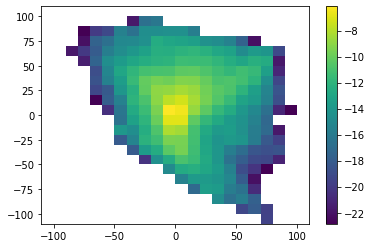

In [89]:
root = 'data/VOCdataset/test'
size = [224,224]
a = np.empty(size)
b = np.empty(size)
for img_name in os.listdir(root):
    root_img = os.path.join(root, img_name)
    img = Image.open(root_img).resize(size)
    img = np.asarray(img)
    img_lab = rgb2lab(img)
    a = np.concatenate((a, img_lab[:,:,1]), axis=0)
    b = np.concatenate((b, img_lab[:,:,2]), axis=0)

x = a.reshape([-1,])
y = b.reshape([-1,])
idx_x = (x>110) + (x<-110) + np.isnan(x)
idx_y = (y>110) + (y<-110) + np.isnan(y)
x_new = x[~idx_x]
y_new = y[~idx_x]
print(x.shape)
print(x_new.shape)
print(y_new.shape)

h_range = np.array([[-110,110], [-110,110]])
h, xaxis, yaxis = np.histogram2d(x_new, y_new, bins=22, range=h_range, density=True)
X,Y = np.meshgrid(xaxis, yaxis)


C:\Users\Hao\AppData\Local\Temp/ipykernel_14676/2837664527.py:1: RuntimeWarning: divide by zero encountered in log
  plt.pcolormesh(X, Y, np.log(h.T))


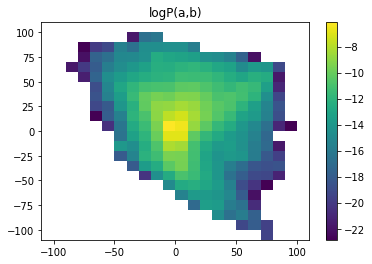

In [90]:
plt.pcolormesh(X, Y, np.log(h.T))
plt.colorbar()
plt.title('logP(a,b)')
plt.show()

# make grid

In [107]:
import torchvision
import torch
from torchvision import transforms
from matplotlib import pyplot as plt

## fruit

In [110]:
data_transforms = transforms.Compose([transforms.Resize([256,256]),transforms.ToTensor()])
fruit_dataset = torchvision.datasets.ImageFolder(root='data/train', transform=data_transforms)
fruit_loader = torch.utils.data.DataLoader(fruit_dataset, batch_size=32, shuffle=True)
imgs = next(iter(fruit_loader))
print(imgs[0].shape)

torch.Size([32, 3, 256, 256])


torch.Size([3, 1034, 2066])


(-0.5, 2065.5, 1033.5, -0.5)

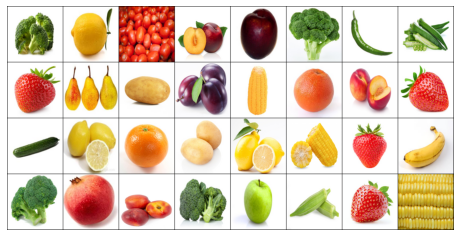

In [117]:
img_grid = torchvision.utils.make_grid(imgs[0])
# print(img_grid.shape)
img_grid = img_grid.permute([1,2,0])
plt.figure(figsize=[8,20])
plt.imshow(img_grid)
plt.axis('off')

## iconography

(-0.5, 2065.5, 1033.5, -0.5)

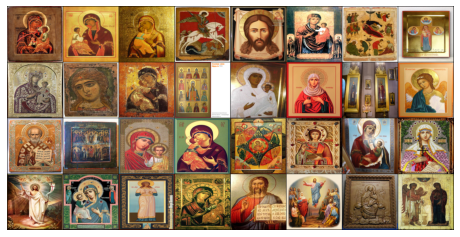

In [120]:
data_transforms = transforms.Compose([transforms.Resize([256,256]),transforms.ToTensor()])
fruit_dataset = torchvision.datasets.ImageFolder(root='data/art_images/musemart/training_set/iconography', 
                                                 transform=data_transforms)
fruit_loader = torch.utils.data.DataLoader(fruit_dataset, batch_size=32, shuffle=True)
imgs = next(iter(fruit_loader))
img_grid = torchvision.utils.make_grid(imgs[0],padding=2)
img_grid = img_grid.permute([1,2,0])
plt.figure(figsize=[8,20])
plt.imshow(img_grid)
plt.axis('off')

## VOC

(-0.5, 2065.5, 1033.5, -0.5)

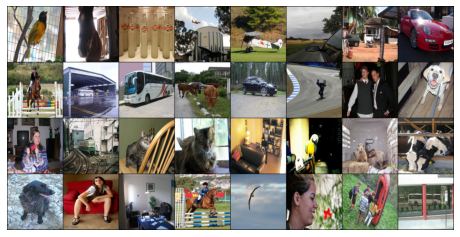

In [121]:
data_transforms = transforms.Compose([transforms.Resize([256,256]),transforms.ToTensor()])
fruit_dataset = torchvision.datasets.ImageFolder(root='data/VOCdataset/test/', 
                                                 transform=data_transforms)
fruit_loader = torch.utils.data.DataLoader(fruit_dataset, batch_size=32, shuffle=True)
imgs = next(iter(fruit_loader))
img_grid = torchvision.utils.make_grid(imgs[0],padding=2)
img_grid = img_grid.permute([1,2,0])
plt.figure(figsize=[8,20])
plt.imshow(img_grid)
plt.axis('off')